Notebook for exploring the Restaurants dataset

Notebook by:
- Margarida Sardinha
- Maria Santos

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from sklearn.preprocessing import MultiLabelBinarizer

In [48]:
dataset = pd.read_csv('data_hyderabad/105_restaurants.csv')
dataset

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In this dataset, we have the following issues:

- There is no restaurant ID, only names which may be repeated
- The links may contain useful information
- Cost should be an integer
- Collection only has values for 51 of the items - We should probably remove this. If we had more time, this section of items could be further analysed, or we could even try to categorize the missing values into these collections
- Cuisines is a list of keywords, should be encoded
- Timings is not usable by the machine, should be converted to a more usable format. There is also a missing value.

In what comes to the alterations on the timing column:
- A restaurant may be open only on weekdays/weekends
- Restaurants can be categorized into: Lunch, Dinner, Moonlight, Daylight, and All Day

For the collections column, we will first check if there is any correlation

In [50]:
dataset['Cost'] = dataset['Cost'].str.replace(',', '').astype(int)
dataset['Collections']  = dataset['Collections'].fillna(' ')
dataset['Collections'] = dataset['Collections'].apply(lambda content: [item.strip().lower() for item in re.split(",", content)])
dataset['Timings'] = dataset['Timings'].astype(str)

In [52]:
dataset.describe()
dataset.describe(exclude=int)

,Name,Links,Collections,Cuisines,Timings
count,105,105,105,105,105
unique,105,105,43,92,78
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,[],"North Indian, Chinese",11 AM to 11 PM
freq,1,1,54,4,6


In [23]:
dataset["Cuisines"] = dataset["Cuisines"].apply(lambda content: [item.strip().lower() for item in re.split(",", content)])

cuisines = []

for idx in range(len(dataset)):
    for cuisine in dataset['Cuisines'].iloc[idx]:
        if cuisine not in cuisines:
            cuisines.append(cuisine)

cuisines

['chinese',
 'continental',
 'kebab',
 'european',
 'south indian',
 'north indian',
 'biryani',
 'asian',
 'mediterranean',
 'desserts',
 'seafood',
 'beverages',
 'goan',
 'healthy food',
 'lebanese',
 'american',
 'ice cream',
 'street food',
 'fast food',
 'bbq',
 'italian',
 'finger food',
 'burger',
 'japanese',
 'salad',
 'sushi',
 'mexican',
 'mughlai',
 'andhra',
 'bakery',
 'juices',
 'arabian',
 'hyderabadi',
 'cafe',
 'spanish',
 'wraps',
 'thai',
 'indonesian',
 'modern indian',
 'momos',
 'pizza',
 'north eastern',
 'mithai',
 'malaysian']

In [24]:
# Apply MultiLabelBinarizer to the cuisines
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(dataset["Cuisines"]), columns=mlb.classes_)

# Concatenate the one-hot encoded with the dataset
dataset = pd.concat([dataset, one_hot_encoded], axis=1)

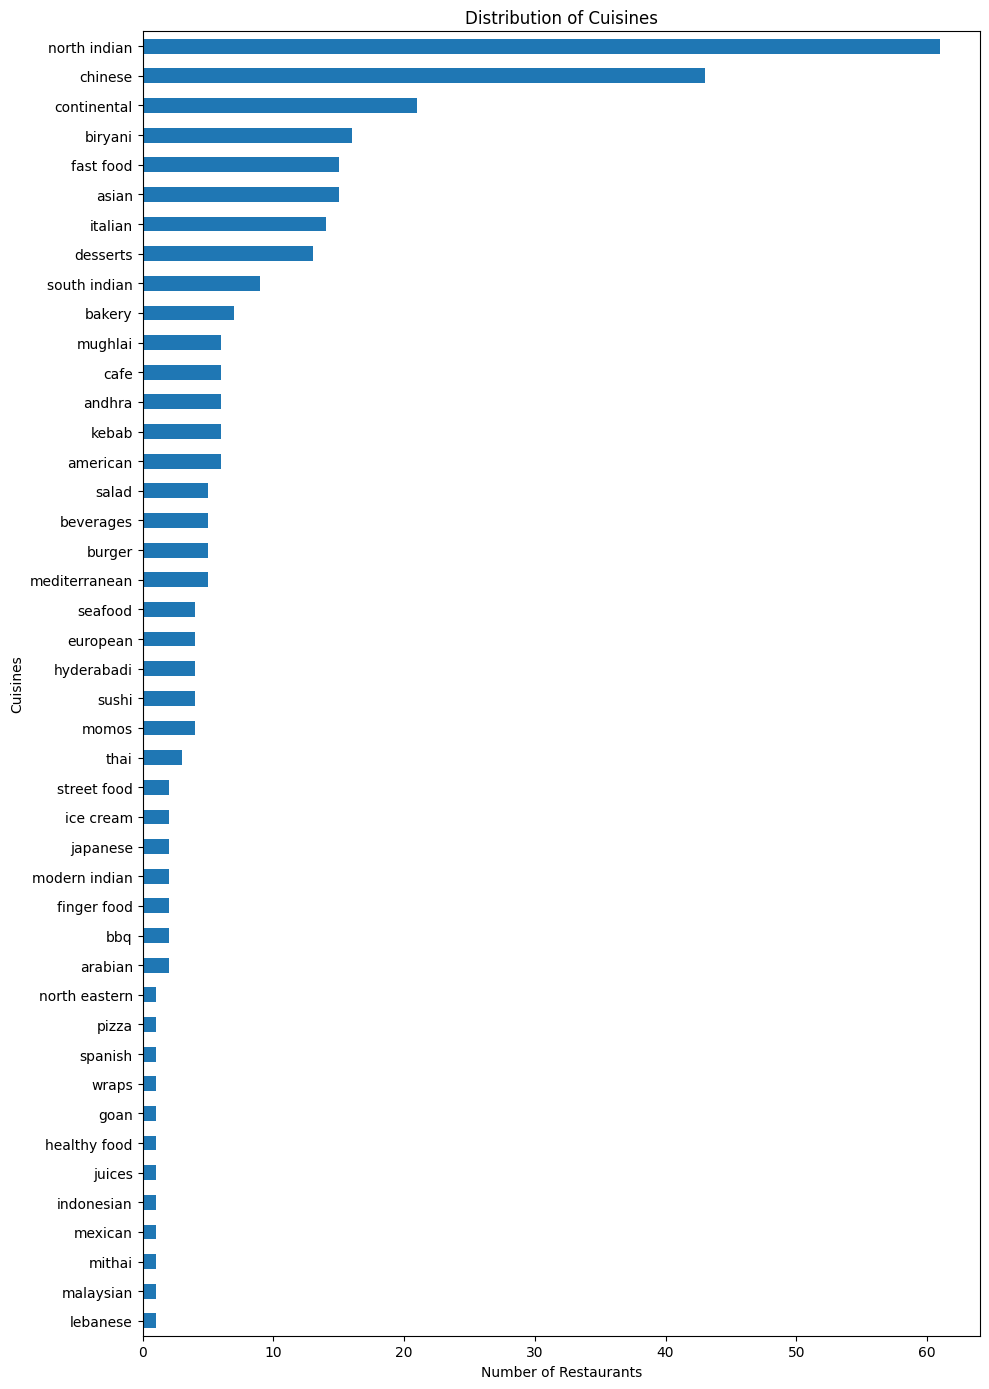

In [25]:
# Sum the one-hot encoded columns to get the distribution of each cuisine, sort for better visualization
cuisine_counts = one_hot_encoded.sum()
cuisine_counts = cuisine_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 14))
cuisine_counts.plot(kind='barh')
plt.title('Distribution of Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()

In [53]:
from typing import List, Tuple

def convert_to_military_time(time_str: str) -> str:
    '''
    Convert a 12-hour time format (AM/PM) to military (24 hour) format
    Input:
        time_str (str): Original time string
    Output:
        time_str (str): Changed time string
    '''
    time_str = time_str.lower().strip()  # Convert to lowercase and strip whitespace

    if "midnight" in time_str:
        return "00:00"
    elif "noon" in time_str:
        return "12:00"
    
    match = re.match(r'(\d{1,2})(?::(\d{2}))?\s*([ap]m)', time_str)
    if match:
        hour = int(match.group(1))
        minute = int(match.group(2)) if match.group(2) else 0
        # Change PM times 
        if match.group(3).lower() == 'pm' and hour != 12:
            hour += 12
        # Change 12PM to 00:00
        if match.group(3).lower() == 'pm' and hour == 12:
            hour = 0
        # Add padding if needed
        return f"{hour:02}:{minute:02}"
    # Return unchanged if conversion fails
    return time_str

In [70]:
def extract_hours_info(hours_string:str) -> tuple:
    '''
    Extracts restaurant opening and closing hours, and whether the restaurant 
    is open on weekends, from a given string.

    Input:
        hours_string (str): A string that includes the opening and closing hours 
        of a restaurant. It may optionally include days of the week in parentheses.

    Output:
        Tuple[str, str, bool]
            - open_time (str): The opening hour extracted from the string.
            - close_time (str): The closing hour extracted from the string.
            - open_weekends (bool): A boolean indicating whether the restaurant is 
            open on weekends. If no days are specified, it is assumed to be open every day.

    '''
    # Regular expressions for extracting opening and closing hours
    time_pattern = r'(\d{1,2}:\d{2}\s*[ap]m|\d{1,2}\s*[ap]m|\d{1,2}\s*(?:midnight|noon))'
    day_pattern = r'\((.*?)\)'  # To capture the days mentioned in parentheses

    # Extract time ranges and day information
    time_ranges = re.findall(r'(' + time_pattern + r'\s*to\s*' + time_pattern + r')', hours_string.lower())
    days = re.findall(day_pattern, hours_string.lower())

    # Initialize variables for final open and close times
    open_times = []
    close_times = []
    open_weekends = False

    # Process each time range found
    for time_range in time_ranges:
        open_time, close_time = time_range[0].strip(), time_range[1].strip()
        open_times.append(convert_to_military_time(open_time))
        close_times.append(convert_to_military_time(close_time))

    # Determine weekend availability
    if days:
        day_info = days[0]  # Assume we only have one day info string
        if "sun" in day_info and ("sat" in day_info or "weekend" in day_info):
            open_weekends = True
    else:
        # If no days mentioned, assume open every day
        open_weekends = True

    # Find final opening and closing times
    final_open_time = min(open_times) if open_times else "00:00"  # Default to midnight if no open times
    final_close_time = max(close_times) if close_times else "00:00"  # Default to midnight if no close times

    return final_open_time, final_close_time, open_weekends


In [71]:
# Applying the function to extract times
dataset['OpenTime'] = ''
dataset['CloseTime'] = ''
dataset['Weekends'] = False

for idx in range(len(dataset)):
    extracted = extract_hours_info(dataset['Timings'].iloc[idx])
    dataset.loc[idx, 'OpenTime'] = extracted[0]
    dataset.loc[idx, 'CloseTime'] = extracted[1]
    dataset.loc[idx, 'Weekends'] = extracted[2]

In [72]:
dataset

,Name,Links,Cost,Collections,Cuisines,Timings,OpenTime,CloseTime,Weekends
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[food hygiene rated restaurants in hyderabad, ...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",12:00,18:30,False
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,[hyderabad's hottest],"Biryani, North Indian, Chinese",11 AM to 11 PM,11:00,11:00,True
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[great buffets, hyderabad's hottest]","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",11:30,18:30,True
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,[late night restaurants],"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,12:00,12:00,True
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[best bars & pubs, food hygiene rated restaura...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",00:00,12:00,False
...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,[],"Fast Food, Salad",11 AM to 11 PM,11:00,11:00,True
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,[],"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",08:00,10:00,False
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,[],"North Indian, Biryani, Chinese",12 Noon to 11 PM,12:00,12:00,True
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,[],Fast Food,8am to 12:30AM (Mon-Sun),08:00,08:00,False
